## What is an Outlier? <br>
It is a completely different record or data point which deviates so much from the other data points.

## Why there are outliers in a dataset?
The outliers can be a result of a mistake during data collection or it can be just an indication of variance in your data.

*For instance, there is a column of salary of people whose age is between 25 to 30. Now most of the times you will see salaries between 3 to 6 lakhs. But there are certain exceptions where salary is 44 and 50 lakhs also. This can be a mistake or it is showing a variance in your data that there are people who earn that much in that age.*

Now how would you decide whether these outliers are important or not. If they are the result of mistake, we can ignore them, but if it is a variance in the data we would need to think.
Suppose there are atleast 30% outliers in a data indicates there is some interesting and meaning insight in outliers and you should not remove them.

## Why outliers should be treated?
Outliers cause significant impact on the Mean and Variance. Also making our model less accurate.

## How outliers should be treated?
If they are the **result of mistake**, we can remove them.<br>
If it is a **variance** in the data we cannot remove them because an outlier can be very informative about the subject-area and data collection process. So it should be treated in such a way that they do not distort statistical analyses (does not change mean and variance).


*   **Z- Score :** If the data follows Normal Distributution

*   **Inter Ouartile Range(IQR) :** If the data is Skewed





# Working on Titanic Dataset<br>
*Let's treat Outliers in `Age` column.*

In [1]:
import pandas as pd

data= pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### *Plotting Box Plot to check Outliers*

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


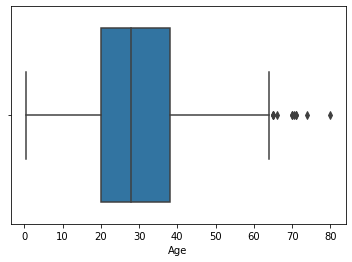

In [2]:
import seaborn as sns
sns.boxplot(data["Age"])

So there are outliers 

### *Now let's see what type of distribution does `Age` column follows.*

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


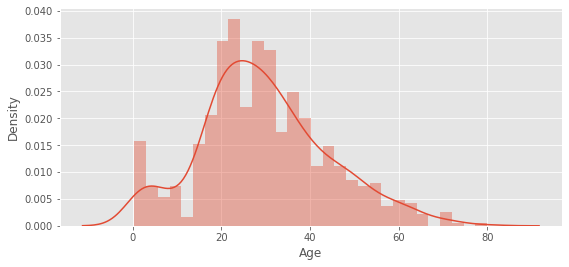

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(9,4))
plt.style.use("ggplot")
sns.distplot(data["Age"], bins=30)

*It can be seen that`Age` follows Normal Distribution. So **Z-Score** will work better to find outliers.*

## Z - score
Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.
So according to Empirical Formula 99.7% of data fall within three standard deviations of the mean. Any data point beyond three standard deviations of the mean is considered as an outlier.

Z-score = (x(i) - mean) / standard deviation

In [4]:
# Z-score function to detect outliers
def detect_outliers(column):
    threshold=3
    mean= data[column].mean()
    std= data[column].std()
    outliers= []
    for i in data[column].values:
        z_score= abs((i-mean)/std)
        if z_score > 3:
            outliers.append(i)
    return outliers

In [5]:
detect_outliers("Age")

[80.0, 74.0]

*80 and 74 are the outliers present in `Age`. Let's also see what are the upper and lower boundaries to detect outliers*

In [6]:
print("lower boundary :", data["Age"].mean() - 3*data["Age"].std() )
print("lower boundary :", data["Age"].mean() + 3*data["Age"].std() )

lower boundary : -13.88037434994331
lower boundary : 73.27860964406095


### Now since we have seen how to use Z- score for normal distributed data, let's also have a look at IQR method to detect outliers. For this I'll be using another dataset with skewed `Age` column.

In [7]:
data2= pd.read_csv("new_train.csv")
data2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


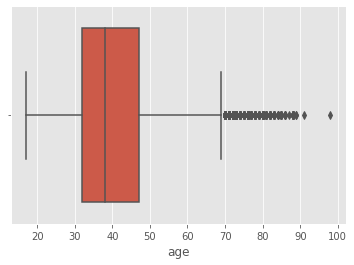

In [8]:
sns.boxplot(data2["age"])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


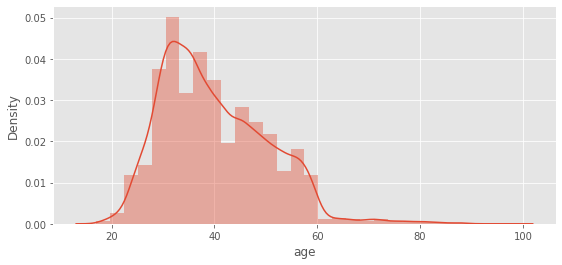

In [9]:
plt.figure(figsize=(9,4))
plt.style.use("ggplot")
sns.distplot(data2["age"], bins=30)

# IQR


*   Q1 is the "middle" value in the first half of the rank-ordered data set. Also **25 percentile**
*   Q2 is the median value in the set. Also **50 percentile**


*   Q3 is the "middle" value in the second half of the rank-ordered data set. Also **75 percentile**
*   IQR = Q3 - Q1

















In [10]:
data2.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


### Compute interquantile range to calculate the boundaries

In [11]:
Q3= data2["age"].quantile(0.75)  # this can also be taken from above 75% = 47
Q1= data2["age"].quantile(0.25)  # 25% = 32
IQR= Q3 - Q1
 
# lower and upper boundaries
lower_bound= data2["age"].quantile(0.25) - (1.5*IQR)
upper_bound= data2["age"].quantile(0.75) + (1.5*IQR)

print("lower_bound:", lower_bound,"\n""upper_bound:", upper_bound)

lower_bound: 9.5 
upper_bound: 69.5



*So any data point below lower_bound and upper_bound will be considered as outliers*

In [12]:
# following are the outliers in age
data2[(data2["age"] > upper_bound) | (data2["age"] < lower_bound)]["age"]

2        78
68       71
88       77
109      80
280      81
         ..
32165    82
32186    76
32464    70
32554    76
32826    80
Name: age, Length: 368, dtype: int64

# Handling Outliers
*Since we cannot remove the outliers in every case, we will replace them by some value.*<br> 
### Replacing the outliers in Age column of Titanic dataset

In [13]:
# for titanic data upper and lower boundaries are
print("lower_bundary:", data["Age"].mean() - 3*data["Age"].std())
print("upper_boundary:", data["Age"].mean() + 3*data["Age"].std())

lower_bundary: -13.88037434994331
upper_boundary: 73.27860964406095


In [14]:
# replace the all the Age values which is greater then 73 by 73
data_without_outliers= data.copy()
data_without_outliers.loc[data_without_outliers["Age"] > 73, "Age"] = 73

### Now compare data with and without outliers

In [16]:
# with outliers in Age
data= pd.read_csv("train.csv")
data["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [17]:
# without outliers in Age
data_without_outliers["Age"].describe()

count    714.000000
mean      29.687913
std       14.490589
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       73.000000
Name: Age, dtype: float64

*We can see that after replacing the outliers with the upper boundary, the maximum age value has been changed from 80 to 73 without impacting any other parameters like mean, standard deviation and quartiles.*